<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Уменьшение и увеличение выборок (импровизация)" data-toc-modified-id="Уменьшение и увеличение выборок (импровизация)-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Уменьшение и увеличение выборок (импровизация)</a></span></li></ul></li><li><span><a href="#Увеличение-F1-на-лучшей-модели" data-toc-modified-id="Увеличение-F1-на-лучшей-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение F1 на лучшей модели</a></span></li><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изменение порога</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нам необходимо довести метрику до 0.59. Проверим *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измерим *AUC-ROC*, сравнив её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<hr style="border: 2px solid blue;" />

## Подготовка данных

In [1]:
# импортируем необходимые нам библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

In [2]:
#прочитаем файл и выведем общую информацию о нем
df = pd.read_csv(r'C:\Users\User\Downloads\Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В столбцах присутствует типы данных int, float, object. Изучим данные более подробно, возможно int преобразуем во float для повышения скорости вычислений.

In [3]:
# выведем количество пропусков 
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

В столбце Tenure присутствуют пропуски. Возможно это клиенты которые меньше года ими являются.

In [4]:
# найдем количестов явных дубликатов 
df.duplicated().sum()

0

Дубликаты отсутствуют

In [5]:
# проверим название столбцов на соответствие стилю
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

столбцы необходмо привесвти в соответствие стилю(убрать заглавные, добавиь нижний регистр)

In [6]:
# Переименуем столбцы на соответствие стилю и проверим результат
df = df.rename(columns={'RowNumber': 'Row_Number', 
                        'CustomerId': 'Customer_Id', 
                        'CreditScore': 'Credit_Score', 
                        'NumOfProducts': 'Num_Of_Products', 
                        'HasCrCard': 'Has_Cr_Card', 
                        'IsActiveMember': 'Is_Active_Member', 
                        'EstimatedSalary': 'Estimated_Salary'})
df.columns = df.columns.str.lower()

# Проверим получившийся результат 
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [7]:
# посмотрим на первые строки таблицы
df.head(10)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [8]:
# проверим ошибки ближе к концу кода
df.tail(10)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3.0,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4.0,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2.0,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7.0,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


вроде бы все нормально

In [9]:
# выведем уникальные значения для каждого столбца 
for column in df.columns:
    print('Уникальные значения для столбца', '\033[1m', column, '\033[0m', ':', df[column].sort_values().unique())
    print("-"*100)

Уникальные значения для столбца  row_number  : [    1     2     3 ...  9998  9999 10000]
----------------------------------------------------------------------------------------------------
Уникальные значения для столбца  customer_id  : [15565701 15565706 15565714 ... 15815656 15815660 15815690]
----------------------------------------------------------------------------------------------------
Уникальные значения для столбца  surname  : ['Abazu' 'Abbie' 'Abbott' ... 'Zuev' 'Zuyev' 'Zuyeva']
----------------------------------------------------------------------------------------------------
Уникальные значения для столбца  credit_score  : [350 351 358 359 363 365 367 373 376 382 383 386 395 399 401 404 405 407
 408 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426
 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444
 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462
 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477

- В столбце **row_number** хранятся значения индекса строки в данных. Думаю, этот столбец следует удалить и не обучать модель этими данными.
- В столбце **customer_id** хранится уникальный идентификатор клиента. Думаю, этим столбцом так же не стоит обучать модель.
- В столбце **surname** хранится фамилия клиента. Аналогично предыдущим двум, этим столбцом обучать не будем.
- В столбце **credit_score** хранится кредитный рейтинг клиента. Тип данных **int**. Пропусков нет, уникальные значения подозрений не вызывают.
- В столбце **geography** хранится страна проживания клиента. Всего три значения Франция, Германия, Испания. Думаю, значения можно заменить на 0 1 и 2 или сделать матрицу. Пропусков нет, уникальные значения подозрений не вызывают.  
- В столбце **gender** хранится пол клиента. Два значения заменим на 0 и 1 или сделаем матрицу. 
- В столбце **age** хранится возраст клиента. Тип данных **int**. Пропусков нет, уникальные значения подозрений не вызывают.
- В столбце **tenure** хранятся данные о том, сколько лет человек является клиентом банка. Тип данных **float**, следует заменить на **int**. В уникальных значениях хранятся цифры от 0 до 10. Ноль скорее всего означает, что клиент обслуживается в банке меньше года. Так же в данных имеется 909 пропусков. Посмотрим на значения более подробно и после примем решение, удалять или заполнять их, и если заполнять, то чем.
- В столбце **balance** хранится баланс на счёте у клиента. Все значения имеют две цифры после запятой. До множим на 100 все значения и заменим тип данных с **float** на **int**. В уникальных значениях есть 0, который скорее всего ноль и означает. Пропусков нет, уникальные значения подозрений не вызывают.
- В столбце **num_of_products** хранится количество продуктов банка, используемых клиентом. Тип данных **int** устраивает. Пропусков нет, уникальные значения подозрений не вызывают.
- В столбце **has_cr_card** хранится значение о наличие кредитной карты. 0 скорее всего означает отсутствие, а ноль означает наличие карты. Хотя модели, наверное, все равно))) Пропусков нет, уникальные значения подозрений не вызывают.
- В столбце **is_active_member** хранятся данные о активности клиента. Скорее всего 1 - наличие активности, 0 - ее отсутствие ее. Пропусков нет, уникальные значения подозрений не вызывают.
- В столбце **estimated_salary** хранится предполагаемая зарплата. Также до множим значения на 100 и присвоим тип данных int. Пропусков нет, уникальные значения подозрений не вызывают.
- В столбце **exited** хранится информация о факте ухода клиента из банка. Всего два значения. 0 и 1. Скорее всего 1 - клиент ушел. 0 - остается клиентом. Пропусков нет, уникальные значения подозрений не вызывают.

In [10]:
# найдем среднее и медальное значение столбца 
print('медиальное значение', df['tenure'].median())
print('среднее значение', df['tenure'].mean())

медиальное значение 5.0
среднее значение 4.997690023099769


Значения средней и медиальной фактически равны, что говорит о отсутствии отдельно больших групп, особенно в малых годах или больших.

In [11]:
# найдем сколько в столбце tenure значений в каждой группе лет.
for tenure in range(0, 11):   
    print(f'при tenure = {tenure} есть {len(df.query("tenure == @tenure"))} абонентов')

при tenure = 0 есть 382 абонентов
при tenure = 1 есть 952 абонентов
при tenure = 2 есть 950 абонентов
при tenure = 3 есть 928 абонентов
при tenure = 4 есть 885 абонентов
при tenure = 5 есть 927 абонентов
при tenure = 6 есть 881 абонентов
при tenure = 7 есть 925 абонентов
при tenure = 8 есть 933 абонентов
при tenure = 9 есть 882 абонентов
при tenure = 10 есть 446 абонентов


In [12]:
# найдем сколько строк с клиентами банка в возрасте 18, где не указан параметр tenure.
print(df[df['age'] == 18]['age'].count() - df[df['age'] == 18]['tenure'].count())

2


В каждой возрастной группе клиентов банка, скажем сопоставимые значения о количестве клиентов (скажем везде порядка 900). Заполнив данные средним значением, мы сильно изменим баланс, и мы исказиться картину. в категории 5 лет будет под 2000, а во всех остальных меньше 1000. Надо искать другие пути восстановления данных. Можно попробовать найти, например, через возраст. Но разброс значений столбца tenure маленький в отличии от столбца age (типа чем старше, тем скорее всего больше пользуешься банком).  Но если будет большая зависимость между двумя столбцами, то это говорит о мультиколлинеаорности факторов, и толку ноль, один столбец придется удалить. Исходя из логики, лицам которым 18, скорее всего в Tenure будет 0, а тем, кому 19, или 1 или 0. Тут уже можно неправильно заполнить данные. Тех кому 18 всего 2 человека из 909.  Думаю, что лучше удалить и оставить верные данные, чем заполнить непонятно чем и исказить. Хотя возможно nan образовался после обьединения таблиц напрмер методом merge, и часть данных была утерена. Могу преположить, что это были данные с нулями. Но нули в данных есть, значит это скорее всего всё-таки пропуски.

In [13]:
# удалим строки с пропусками
df = df.dropna().reset_index(drop=True)

# создадим функцию замены типа данных в int64 
def int_64(columns):
    for column in columns:
        df[column] = df[column].astype('int64')
int_64(['tenure'])
df.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [14]:
# преобразуем колонку geography техникой OHE, избегая дамми-ловушку
geography_ohe = pd.get_dummies(df['geography'], drop_first=True)
# найдем количество клиентов по регионам
geography_ohe.sum()

Germany    2293
Spain      2248
dtype: int64

Получается жителей из Германии и Испании практически одинаково, а жителей из Франции в двое больше. 

In [15]:
# удалим столбец geography
df = df.drop('geography', axis=1)
# добавим эти столбцы в таблицу
for column in geography_ohe.columns:
    df[column] = geography_ohe[column]
df.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
Germany             0
Spain               0
dtype: int64

In [16]:
# преобразуем значения 'Female' 'Male' в столбце geography в 0 и 1
# техникой OHE и при помощи удаления первого столбца
gender_ohe = pd.get_dummies(df['gender'], drop_first=True)
gender_ohe.sum()

Male    4974
dtype: int64

Тут мужчины и женщины находятся в соотношении 4 к 5, почти поровну.

In [17]:
# присвоим новые значение в столбец 
df['gender'] = gender_ohe

In [18]:
# проведем замену типа данных в столбцах balance, estimated_salary
for column in ['balance', 'estimated_salary']:
    df[column] = 100*df[column].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   row_number        9091 non-null   int64 
 1   customer_id       9091 non-null   int64 
 2   surname           9091 non-null   object
 3   credit_score      9091 non-null   int64 
 4   gender            9091 non-null   uint8 
 5   age               9091 non-null   int64 
 6   tenure            9091 non-null   int64 
 7   balance           9091 non-null   int64 
 8   num_of_products   9091 non-null   int64 
 9   has_cr_card       9091 non-null   int64 
 10  is_active_member  9091 non-null   int64 
 11  estimated_salary  9091 non-null   int64 
 12  exited            9091 non-null   int64 
 13  Germany           9091 non-null   uint8 
 14  Spain             9091 non-null   uint8 
dtypes: int64(11), object(1), uint8(3)
memory usage: 879.0+ KB


In [19]:
# приведем названия столбцов Germany, Spain к нижнему регистру 
df.columns = df.columns.str.lower()

In [20]:
# проведем замену типа данных в столбцах gender, germany, spain
int_64(['gender', 'germany', 'spain'])

Хотя возможно, этого можно было и не делать, а оставить тип данных uint8, он тоже вроде бы быстрый.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   row_number        9091 non-null   int64 
 1   customer_id       9091 non-null   int64 
 2   surname           9091 non-null   object
 3   credit_score      9091 non-null   int64 
 4   gender            9091 non-null   int64 
 5   age               9091 non-null   int64 
 6   tenure            9091 non-null   int64 
 7   balance           9091 non-null   int64 
 8   num_of_products   9091 non-null   int64 
 9   has_cr_card       9091 non-null   int64 
 10  is_active_member  9091 non-null   int64 
 11  estimated_salary  9091 non-null   int64 
 12  exited            9091 non-null   int64 
 13  germany           9091 non-null   int64 
 14  spain             9091 non-null   int64 
dtypes: int64(14), object(1)
memory usage: 1.0+ MB


В ходе подготовки данных мы:
- привели название столбцов в соответствие со стилем 
- удалили пропуски
- столбцы с цифровыми значения привели к типу данных int64
- преобразовали столбец geography техникой OHE, избегая дамми-ловушку
- в столбце gender заменили значения Female и Male, на 0 и 1
- в столбце tenure удалили nan

## Исследование задачи

Для обучающего датафрейма, думаю такие столбцы как row_number, customer_id, surname включать не стоит. Они относятся к идентификации клиента и крайне маловероятно помогут решению задачи. Хотя теоретически, клиенты могут уходить с начала списка, или, например, с конца. Для этого необходимо будет перемешать значения.

Также мне кажется возможно можно попробовать еще отделить часть признаков, не связанных с отношениями клиента и банка, такие как пол и место проживания. Оставить типа только признаки характеризующие отношения клиента и банка. 

По-хорошему, не мешало бы провести полноценное исследование, и узнать какие признаки больше всего влияют на целевой признак и потом используя только их обучить модель. Но, думаю, это не входит в рамки данного проекта. 

**Цель: необходимо спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.**

**Задача:**
- Обучить модель без учёта дисбаланса.
- Улучшите качество модели, учитывая дисбаланс классов.
- Обучите разные модели и найти лучшую 
- Получить метрику F-1 минимум 0.59

In [22]:
# удалим столбцы с ненужными признаками
df = df.drop(['row_number', 'customer_id', 'surname'], axis=1) #
df

,credit_score,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,germany,spain
0,619,0,42,2,0,1,1,1,10134800,1,0,0
1,608,0,41,1,8380700,1,0,1,11254200,0,0,1
2,502,0,42,8,15966000,3,1,0,11393100,1,0,0
3,699,0,39,1,0,2,0,0,9382600,0,0,0
4,850,0,43,2,12551000,1,1,1,7908400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9086,800,0,29,2,0,2,0,0,16777300,0,0,0
9087,771,1,39,5,0,2,1,0,9627000,0,0,0
9088,516,1,35,10,5736900,1,1,1,10169900,0,0,0
9089,709,0,36,7,0,1,0,1,4208500,1,0,0


Найдем границы выбросов для каждого столбца c нормальным распределением данных, бинарные столбцы брать не будем.

In [23]:
# выделим столбцы с не бинарными данными
ejection_columns = ['credit_score', 'age',  'tenure', 'balance', 'estimated_salary']

In [24]:
# будем хранить значения левых и правых границ в соответсвующих списках
left_restrictions = []
right_restrictions = []
# объявим счетчик индексов
i = 0
# найдем размахи усов для столбцов
for column in ejection_columns:
    df_ = pd.DataFrame()
    df_[column] = df[column].sort_values()
    # создадим новые инексы
    df_ = df_.reset_index(drop=True)
    # найдем Q1 и Q3 
    Q1 = df_.loc[int(round((len(df_)-1)/4)), column]
    Q3 = df_.loc[int(round((len(df_)-1)*3/4)), column]
    # найдем лево и правое отклонение "усов"
    left = Q1-(Q3-Q1)*1.5
    right = Q3+(Q3-Q1)*1.5
    # если отклонение выйдет за границы размерности, то присвоим значение граничного значения
    if left < float(df_[column].min()):
        left = float(df_[column].min())
    if right > float(df_[column].max()):
        right = float(df_[column].max())
    left_restrictions.append(left)
    right_restrictions.append(right)
    print(f'''Для столбца {column}:
                  левая гранциа = {left_restrictions[i]}
                  правая граница = {right_restrictions[i]}''')
    i += 1

Для столбца credit_score:
                  левая гранциа = 384.5
                  правая граница = 850.0
Для столбца age:
                  левая гранциа = 18.0
                  правая граница = 62.0
Для столбца tenure:
                  левая гранциа = 0.0
                  правая граница = 10.0
Для столбца balance:
                  левая гранциа = 0.0
                  правая граница = 25089800.0
Для столбца estimated_salary:
                  левая гранциа = 1100.0
                  правая граница = 19999200.0


Удалим выбросы 

In [25]:
# так как левый минимум равен минимальным значениям, то удалим строки, которые превышают правый
j = 0
for column in ejection_columns:
    df = df.loc[df[column] <= right_restrictions[j]]
    j += 1
# создадим новые индексы
#df = df.reset_index(drop=True)
# узнаем длину нового датафрейма
len(df)

8755

Ушло всего 336 значений. Удалим их.

Обучим модели сначала исходными данными. Но перед этим перемешаем значеия. 

In [26]:
# перемешаем значения, чтобы более равномерно распределить нули и единицы 
# целевого признака по обучающий, валидационной и тестовой выборке 
df_shuffle = shuffle(df, random_state=12345)

In [27]:
# разобьем данные на обучающую, валидационную и тестовую выборку в соотношении 3:1:1 соответственно
df_train, df_validate, df_test = np.split(df_shuffle, [int(.6*len(df)), int(.80*len(df_shuffle))])
train_features = df_train.drop('exited', axis=1)
train_target = df_train['exited']
validate_features = df_validate.drop('exited', axis=1) 
validate_target = df_validate['exited']
test_features = df_test.drop('exited', axis=1)
test_target = df_test['exited']
# проверим длину выборок
print(df_train.shape)
print(df_validate.shape)
print(df_test.shape)

(5253, 12)
(1751, 12)
(1751, 12)


In [28]:
# создадим функции моделей дерева решений, случайного леса и логической регрессии
def tree_model(value_hyperparameter):
    return DecisionTreeClassifier (random_state=12345, max_depth=value_hyperparameter)

def forest_model(value_hyperparameter):
    return RandomForestClassifier(random_state=12345, n_estimators=value_hyperparameter*25)

def regression_model(value_hyperparameter):
    return LogisticRegression(random_state=12345, max_iter=value_hyperparameter*50)

In [29]:
# создадим функцию обучения модели и найдем лучшие значения f1
def good_model(func, name_model, name_gyper):
    # так как исходя из описания проекта  f1 необходимо довести 
    # по крайней мере до 0.59, то создадим переменную 
    # которая будет хранить искомое значение (f1)
    f1 = 0.59
    # а также список в котором будем хранить данные гиперпараметра и значение соответствующие ему значение f1
    first_excess = []
    
    # Еще создадим переменные хранящие максимальное значение f1
    # максимального значения гиперпараметра и подсчета количества неправильных обучений подряд
    f1_max = 0
    f1_auc_roc = 0
    auc_roc_max = 0 
    auc_roc_f1 = 0
    
    value_hyperparameter = 1
    f1_hyperparameter = 1
    auc_roc_hyperparameter = 1
    fail = 0
    
    repeats = 0
    
    # Для наглядности изменений точности предсказаний от изменения значения гиперпараметра построим график
    # для этого очитсим списки в которых будем хранить необходимые значения
    x_hyper = []
    y_f1 = []
    y_auc_roc = []
    
    # если количество провалов подряд больше 10, то закончим обучение модели 
    while fail < 11 and repeats < 50: 
        model = func(value_hyperparameter)
        model.fit(train_features, train_target)
        answers = model.predict(validate_features)
        
        # найдем значение F1
        f1_accuracy = f1_score(validate_target, answers) 
        x_hyper.append(value_hyperparameter)
        y_f1.append(f1_accuracy)
        
        # найдем площадь под AUC-ROC кривой 
        probabilities_valid = model.predict_proba(validate_features)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(validate_target, probabilities_one_valid)
        y_auc_roc.append(auc_roc)
        
        # найдем максимальное значение f1
        if f1_accuracy > f1_max:
            f1_max = f1_accuracy
            f1_hyperparameter = value_hyperparameter
            f1_auc_roc = auc_roc
            # так как обучение удачное, то обнулим счетчик провалов
            fail = 0
        # если обучение хуже максимума, то добавим значение в количество провалов подряд         
        else:
            fail += 1
        
        # найдем максимальное значение AUC-ROC
        if auc_roc >= auc_roc_max:
            auc_roc_max = auc_roc
            auc_roc_f1 = f1_accuracy
            auc_roc_hyperparameter = value_hyperparameter
            
        value_hyperparameter +=1   
        repeats += 1
    # построим график 
    plt.plot(x_hyper,y_f1)
    plt.plot(x_hyper,y_auc_roc)
    plt.legend(('F1', 'AUC-ROC'), loc='center right', shadow=True)
    plt.suptitle(f'График доли правильных ответов \n для модели "{name_model}"', fontsize=14, fontweight="bold")
    plt.xlabel(f'Значение гиперпараметра "{name_gyper}"', fontsize=14)    
    plt.ylabel('Значение', fontsize=14)   
    
    # Выведем максимальное значение f1 и соответствующие ему значение гиперпараметра и AUC-ROC
    print(f'''
             При максимальном значении f1 = {f1_max} 
                    гиперпараметр = {f1_hyperparameter}
                    AUC-ROC = {f1_auc_roc}
                    
             При максимальном значении AUC-ROC = {auc_roc_max} 
                    гиперпараметр = {auc_roc_hyperparameter}
                    f1 = {auc_roc_f1}       
                    ''')
    return y_f1, y_auc_roc

*P.s.*
- *Вывод первого значения меннее 0.59, сделан из расчета, что, если мол стоит задача добиться 0.59 на самой быстрой модели, то самая быстрая модель, будет та, у которой минимальные значения гиперпараметра.*
- *Максимальное ограничение не вводил, так как мы сравниваем не с предыдущим ходом, а с максимальным значением. Плюс мне кажется, что модель рано или поздно переучится и значение упадет.*

In [30]:
# создадим функцию которая выведет коэффициент Пирсона и построит диаграмму рассеяния
def pirson(y_f1, y_auc_roc):  
    plt.scatter(y_f1, y_auc_roc)
    plt.suptitle('График зависимости f1 и AUC-ROC', fontsize=14)
    plt.xlabel('f1', fontsize=14)
    plt.ylabel('AUC-ROC', fontsize=14)
    y_f1 = pd.DataFrame(y_f1)
    y_auc_roc = pd.DataFrame(y_auc_roc)
    print('Коэффициент Пирсона =', y_f1[0].corr(y_auc_roc[0]))

In [31]:
# произведем масштабирование признаков
scaler = StandardScaler()
scaler.fit(train_features) 
train_features = pd.DataFrame(scaler.transform(train_features), index=train_features.index, columns=train_features.columns)
validate_features = pd.DataFrame(scaler.transform(validate_features), index=validate_features.index, columns=validate_features.columns)
test_features = pd.DataFrame(scaler.transform(test_features), index=test_features.index, columns=test_features.columns)

Oбучим модели данных без учета дисбаланса, а потом с учетом.


             При максимальном значении f1 = 0.5834738617200674 
                    гиперпараметр = 7
                    AUC-ROC = 0.8265857275478341
                    
             При максимальном значении AUC-ROC = 0.8505308866731772 
                    гиперпараметр = 5
                    f1 = 0.54014598540146       
                    


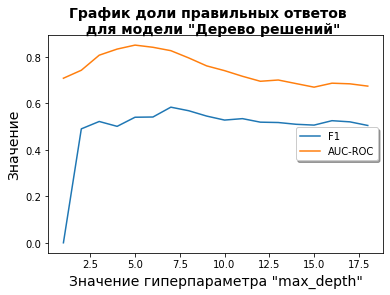

In [32]:
# Выведем первое превышение значения f1 выше 0,59 и максимальное значение f1
# в ходе теста до 5-ти неудач для модели Дерево решений
y_f1, y_auc_roc = good_model(tree_model, "Дерево решений", "max_depth")

Коэффициент Пирсона = 0.23419034092368562


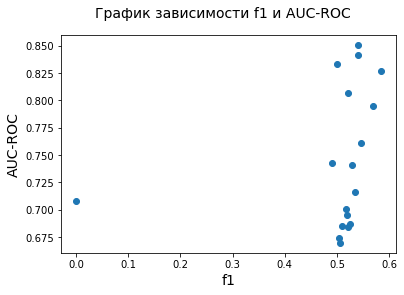

In [33]:
# найдем зависимость между f1 и AUC-ROC и построит диаграмму рассеяния для 
pirson(y_f1, y_auc_roc)

Как видно из графика при одинаковых (очень близких) значениях F1 имеются разные значения AUC-ROC, о чем и говорит низкий коэффициент корреляции. Но, если внимательно посмотреть на график правильных ответов, то можно заметить подобие линий, и повторение очертаний, особенно после значения глубины дерева 7. До этого момента зависимость очень слабая. 
При максимальном значении метрики f1 значение AUC-ROC меньше максимального на 2,8%. 


             При максимальном значении f1 = 0.5777777777777778 
                    гиперпараметр = 4
                    AUC-ROC = 0.8512773832632049
                    
             При максимальном значении AUC-ROC = 0.8551414827049901 
                    гиперпараметр = 8
                    f1 = 0.5595854922279793       
                    


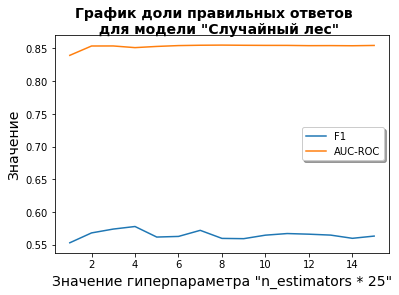

In [34]:
# Выведем первое превышение значения f1 выше 0,59 и максимальное значение f1
# в ходе теста до 5-ти неудач для модели Случайный лес
y_f1, y_auc_roc = good_model(forest_model,"Случайный лес", "n_estimators * 25")

Коэффициент Пирсона = 0.3844379641039225


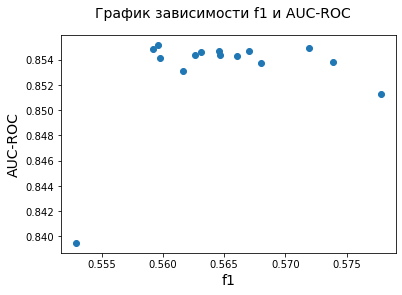

In [35]:
# найдем зависимость между f1 и AUC-ROC и построит диаграмму рассеяния для 
pirson(y_f1, y_auc_roc)

Практически аналогично как для предыдущей модели, линейная зависимость слабя, при одинаковых значениях f1 заметно разное AUC-ROC и наоборот, при схожих значениях AUC-ROC, совсем не схожие значения f1. 
При максимальном значении f1 значение AUC-ROC меньше на 0.45% от максимального AUC-ROC


             При максимальном значении f1 = 0.4293785310734463 
                    гиперпараметр = 1
                    AUC-ROC = 0.8084769058268932
                    
             При максимальном значении AUC-ROC = 0.8084769058268932 
                    гиперпараметр = 12
                    f1 = 0.4293785310734463       
                    


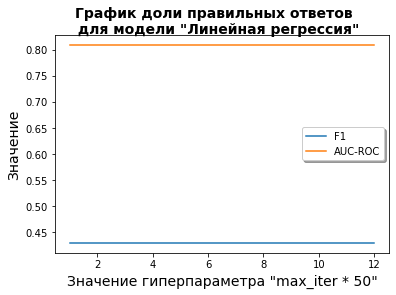

In [36]:
# Выведем первое превышение значения f1 выше 0,59 и максимальное значение f1
# в ходе теста до 5-ти неудач для модели Линейная регрессия 
y_f1, y_auc_roc = good_model(regression_model, "Линейная регрессия", "max_iter * 50")

Коэффициент Пирсона = nan


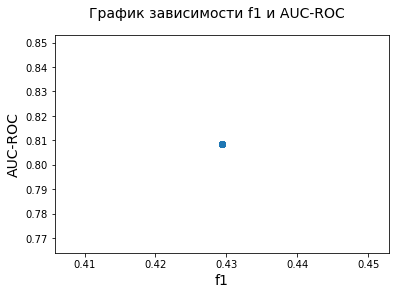

In [37]:
# найдем зависимость между f1 и AUC-ROC и построит диаграмму рассеяния для 
pirson(y_f1, y_auc_roc)

Тут тяжел что сказать, так как значения f1 и AUC-ROC не менялись от изменения гиперпараметра.

Возьмём модели только дерева решений и случайного леса. Логическую регрессию брать не будем, она не подходит для решения нашей задачи

Лучше всего в данный момент проявила себя модель дерева решений.

## Борьба с дисбалансом

In [38]:
def f1_auc_roc(func, train_features, train_target):
    f1_max = 0     
    f1_auc_roc = 0 
    fail = 0
    value_hyperparameter = 1
    good_value_hyperparameter = 1
    repeats = 0
    while fail < 11 and repeats < 50: 
        model = func(value_hyperparameter)
        model.fit(train_features, train_target)
        
        # найдем значение f1
        answers = model.predict(validate_features)
        f1 = f1_score(validate_target, answers)
              
        # найдем площадь под AUC-ROC кривой 
        probabilities_valid = model.predict_proba(validate_features)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(validate_target, probabilities_one_valid)
        
        # найдем максимальное значение f1 и соответствующее значение AUC-ROC
        if f1 > f1_max:
            f1_max = f1
            f1_auc_roc = auc_roc
            good_value_hyperparameter = value_hyperparameter
            fail = 0
        else:
            fail += 1
            
        value_hyperparameter += 1
        repeats += 1
    return f1_max, f1_auc_roc, good_value_hyperparameter

In [39]:
def max_f1(train_features, train_target):
    # Выведем  максимальное значения f1 и auc_roc дерева решений
    f1, auc_roc, hyperparameter = f1_auc_roc(tree_model, train_features, train_target)
    print('\033[1mДерево решений\033[0m')
    print(f'С лучшей глубиной дерева {hyperparameter}')
    print(f'достигли:')
    print(f'         f1 = {f1}')
    print(f'         AUC-ROC = {auc_roc}')
    print()
    # Выведем  максимальное значения f1 и auc_roc случайного леса
    f1, auc_roc, hyperparameter = f1_auc_roc(forest_model, train_features, train_target)
    print('\033[1mСлучайный лес\033[0m')
    print(f'С лучшим количеством оценщиков {hyperparameter*25}')
    print(f'достигли:')
    print(f'         f1 = {f1}')
    print(f'         AUC-ROC = {auc_roc}')

### Взвешивание классов

In [40]:
# и количество клиентов которые покинули банк
print('Покинуло', len(df[df['exited'] == 1]))
# найдем количество клиентов, которые остались клиентами банка 
print('Остались клиентами', len(df[df['exited'] == 0]))

Покинуло 1787
Остались клиентами 6968


Как видно, клиентов, которые покинули банк порядка 4 раз меньше чем тех, кто остался.

#### Увеличение выборки

In [41]:
# разобьем выборки на положительные и отрицательные
features_ones = train_features[train_target==1]
features_zeros = train_features[train_target==0]
train_ones = train_target[train_target==1]
train_zeros = train_target[train_target==0]

# увеличим количество значений ухода в 4 раза
up_train_features = pd.concat([features_zeros] + [features_ones] * 4)
up_train_target = pd.concat([train_zeros] + [train_ones] * 4)
up_train_features, up_train_target = shuffle(up_train_features, up_train_target, random_state=12345)

In [42]:
# посмотрим, как отобразится на обучении увеличение выборки
max_f1(up_train_features, up_train_target)

Дерево решений
С лучшей глубиной дерева 4
достигли:
         f1 = 0.5795574288724973
         AUC-ROC = 0.8400538120556688

Случайный лес
С лучшим количеством оценщиков 300
достигли:
         f1 = 0.5848484848484848
         AUC-ROC = 0.8477970815298861


Модель дерева решений после масштабирования потеряла 0,4%, а случайный лес добавила 0.7% точности, но все еще не хватает до отметки в 0,59. 

#### Уменьшение выборки

In [43]:
# уменьшим количество значений ухода в 4 раза
down_train_features = pd.concat([features_zeros.sample(frac=0.25, random_state=12345)] + [features_ones])
down_train_target = pd.concat([train_zeros.sample(frac=0.25, random_state=12345)] + [train_ones])
down_train_features, down_train_target = shuffle(down_train_features, down_train_target, random_state=12345)

In [44]:
# посмотрим, как отобразится на обучении уменьшение выборки
max_f1(down_train_features, down_train_target)

Дерево решений
С лучшей глубиной дерева 4
достигли:
         f1 = 0.5806451612903226
         AUC-ROC = 0.8198853429463607

Случайный лес
С лучшим количеством оценщиков 200
достигли:
         f1 = 0.5922746781115881
         AUC-ROC = 0.8520871763339481


Модель дерева решений после уменьшения выборки потеряло 0,28% , случайный лес добавил 1.5% точности, и наконец барьер в 0.59 был преодолен.

#### Уменьшение и увеличение выборок (импровизация)

In [45]:
# увеличим количество значений ухода в 2 раза, а количество тех, кто остался уменьшим в 2 раза
ud_train_features = pd.concat([features_zeros.sample(frac=0.5, random_state=12345)] + [features_ones]*2)
ud_train_target = pd.concat([train_zeros.sample(frac=0.5, random_state=12345)] + [train_ones]*2)
ud_train_features, ud_train_target = shuffle(ud_train_features, ud_train_target, random_state=12345)#6296257

In [46]:
# посмотрим, как отобразится на обучении одновременное уменьшение и увеличение выборки
max_f1(ud_train_features, ud_train_target)

Дерево решений
С лучшей глубиной дерева 7
достигли:
         f1 = 0.5866050808314088
         AUC-ROC = 0.8257317274111939

Случайный лес
С лучшим количеством оценщиков 425
достигли:
         f1 = 0.6063569682151589
         AUC-ROC = 0.8495593359294937


Дерево решений наконец добавило в точности, хоть и 0,31%.
Случайный лес прибавил 2,86%. 
Думаю, можно сказать, что эксперимент удался, так, как и дерево решений и случайный лес показали лучший результат, в том числе и наилучший по всем тестам. 

### Увеличение F1 на лучшей модели  

In [47]:
# создадим функцию которая будет обучать модель после удаления столбцов 
def last_hope_model(train_features, train_target, validate_features, validate_target):
    model_tree.fit(train_features, train_target)
    answer = model_tree.predict(validate_features)
    f1 = f1_score(answer, validate_target)
    return f1

In [48]:
# создадим функцию которая будет обучать модель после удаления столбцов 
def last_hope_model(train_features, train_target, validate_features, validate_target):
    model_forest = RandomForestClassifier(random_state=12345, n_estimators=450)
    model_forest.fit(train_features, train_target)
    answer = model_forest.predict(validate_features)
    f1 = f1_score(answer, validate_target)
    return f1

In [49]:
# организуем цикл и поочередно будем удалять столбцы пока не найдем лучший результат.
j = 0
i = 1
good_f1 = 0
columns = ud_train_features.columns
#удалим поочередно столбцы начиная с одного первого, 
#потом удалим первый и второй и тд пока не останется один последний
while i < len(ud_train_features.columns):
    new_train_features = ud_train_features.drop(columns[j:i], axis=1)
    new_validate_features = validate_features.drop(columns[j:i], axis=1)
    f1 = last_hope_model(new_train_features, ud_train_target,  new_validate_features, validate_target)
    if f1 >= good_f1:
        good_f1 = f1
        bad_columns = columns[j:i]      
    i+=1
    # так как смысла в комбинации удаления второго и первого нет
    # так как комбинация удаления первого и второго была, и тому подобные зеркальная комбинации 
    # то далее будем искать без столбца, который прошел все комбинации
    if i == len(train_features.columns):
        j+=1
        i = j+1
print(good_f1)
print(bad_columns)

0.6140776699029127
Index(['is_active_member', 'estimated_salary'], dtype='object')


Увеличить значение F1, можно удалив столбцы is_active_member и estimated_salary.

### Изменение порога

In [50]:
# удалим "ненужный" признак
ud_train_features = ud_train_features.drop(bad_columns ,axis=1)
validate_features = validate_features.drop(bad_columns ,axis=1)
test_features = test_features.drop(bad_columns ,axis=1)

In [51]:
# возьмём модель с лучшим результатом на данный момент — это
# случайный лес обученный на уменьшено/увеличенной выборке 
# без признака is_active_member и estimated_salary
# обучим модель
new_model_forest = RandomForestClassifier(random_state=12345, n_estimators=450)
new_model_forest.fit(ud_train_features, ud_train_target)

# найдем пороговые значения для модели случайного леса
probabilities_valid_logis = new_model_forest.predict_proba(validate_features)
probabilities_one_valid = probabilities_valid_logis[:, 1]

# Найдем лучший порог при котором значение f1 наибольшее
old_f1 = 0
for threshold in np.arange(0, 1.0, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(validate_target, predicted_valid)
    recall = recall_score(validate_target, predicted_valid)
 
    # так как F1 находится по формуле (2 * Precision * Recall)/(Precision + Recall)
    # то найдем лучший порог
    new_f1 = (2 * precision * recall)/(precision + recall)
    if new_f1 > old_f1:
        good_threshold = round(threshold,2)
        old_f1 = new_f1
    
print(f"При пороге = {good_threshold} f1 = {old_f1}")
    
# найдём площадь под ROC-кривой 
auc_roc = roc_auc_score(validate_target, probabilities_one_valid)
print('Площадь под ROC-кривой =', auc_roc)

При пороге = 0.51 f1 = 0.6159509202453988
Площадь под ROC-кривой = 0.8438315067777469


При борьбе с дисбалансом выяснилось, что:
- **Лучшим методом** для борьбы с ним оказался **импровизированный** способ (одновременно увеличения одной и уменьшение другой выборки). 
- **Лучшей моделью**, оказалась модель **случайного леса**, обученная на увеличено/уменьшенной выборке с **числом оценщиков 450**.
- **Сильная зависимость** между метрикой f1 и AUC-ROC **отсутствует**. Их максимумы не совпадают, а исходя из графика правильных ответов, при одних значениях первой, имеем разные значения второй и наоборот. А также при максимуме первой меры, максимум второй не достигается и наоборот.   
- После **изменения порогового** значения точность **увеличилась** на 0,19%

## Тестирование модели

In [52]:
# Найдем f1 при лучшем пороге
probabilities_valid_logis = new_model_forest.predict_proba(test_features)
probabilities_one_valid = probabilities_valid_logis[:, 1]
predicted_valid = probabilities_one_valid > good_threshold
precision = precision_score(test_target, predicted_valid)
recall = recall_score(test_target, predicted_valid)
    
print(f"При пороге = {good_threshold} f1 = {old_f1}")
    
# найдём площадь под ROC-кривой 
auc_roc = roc_auc_score(test_target, probabilities_one_valid)
print('Площадь под ROC-кривой =', auc_roc)

При пороге = 0.51 f1 = 0.6159509202453988
Площадь под ROC-кривой = 0.8363059445498204


При увлечении порога до 0.51 удалось достигнуть, преодоления величины метрики f1 более 0.59 как на валидационной, так и на тестовой выборке.

 ## Вывод:
- Проведена подготовка и исследовательский анализ данных
- Проведена подготовка признаков 
- Проведено обучение и выбор лучшей модели
- Проведен анализ зависимости метркии f1 и AUC-ROC  
- Достигнуто необходимо значение метрики F1